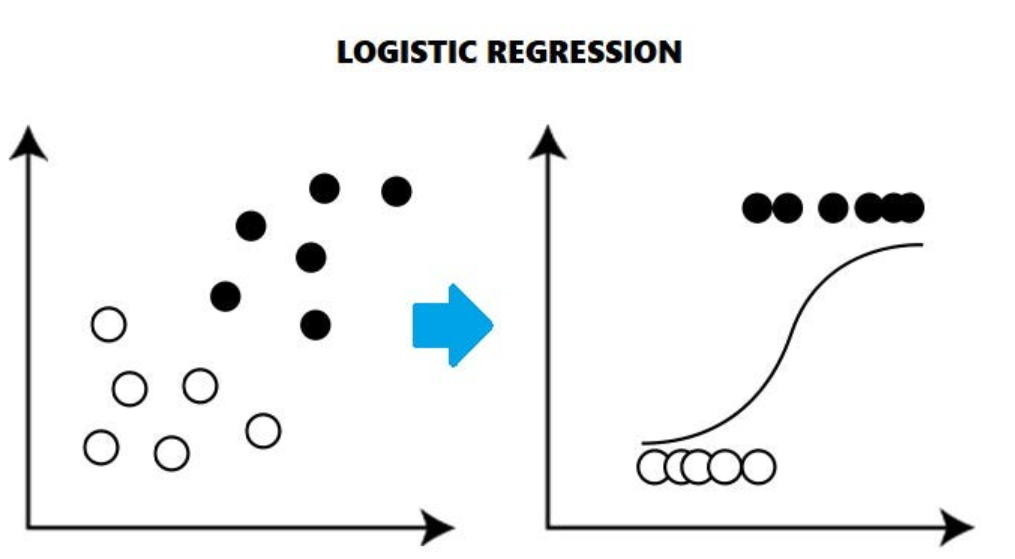

# Introduction to Logistic Regression

**Logistic Regression** : is one of the most widely used algorithms in statistics and machine learning, primarily applied to classification problems. Unlike Linear Regression, which predicts continuous values, Logistic Regression estimates the probability that a given instance belongs to a particular class (e.g., Yes/No, 0/1).

The algorithm relies on the **logistic (sigmoid) function**, which maps linear combinations of input features into probabilities ranging between 0 and 1. This makes it suitable for binary classification, and it can also be extended to handle multiple classes using **Multinomial Logistic Regression.**

Logistic Regression has a wide range of real-world applications, including:


*   Predicting the likelihood of a patient having a disease.
*   Classifying emails as spam or not spam.
*   Estimating the probability of a customer purchasing a product.

Its simplicity, efficiency, and interpretability make Logistic Regression a fundamental technique and a strong baseline for many classification tasks.


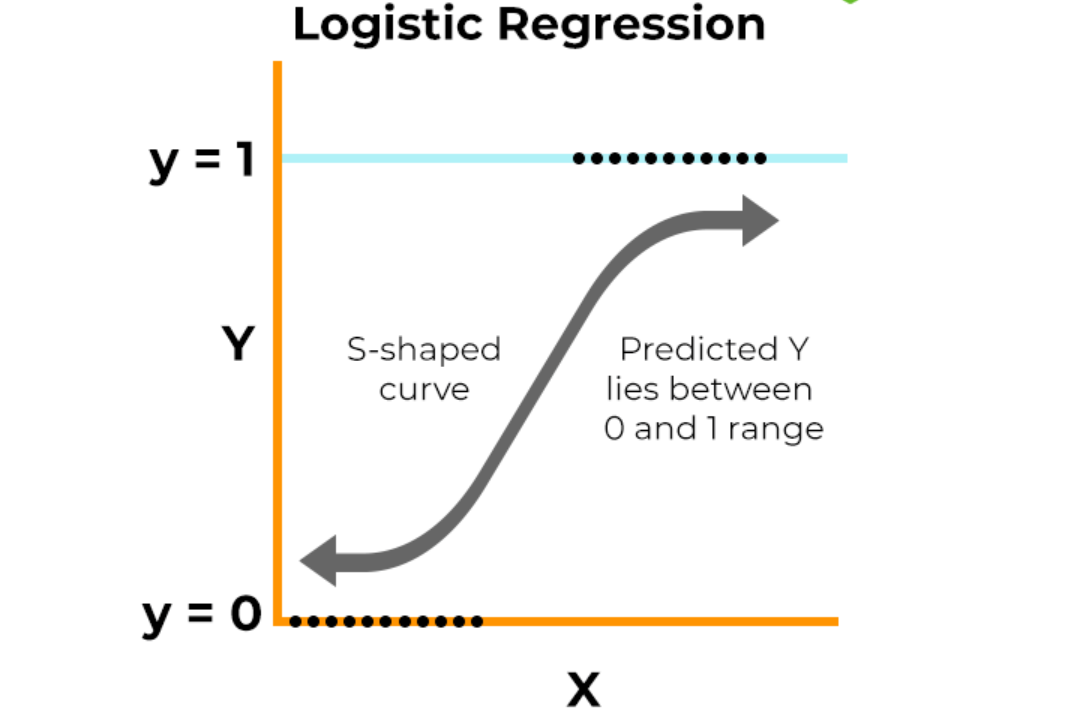

# Project Idea

This project focuses on building a machine learning model using **Logistic Regression** to recognize handwritten digits from blurred grayscale images. The dataset consists of digit images (0–9) represented in pixel form, which are divided into training and testing sets. The model is trained to learn the patterns of each digit from the training data and then tested on unseen images to evaluate its performance. By applying Logistic Regression, the project demonstrates how supervised learning can be used for image classification tasks, achieving accurate predictions and showcasing the power of machine learning in computer vision applications.

# Importing libraries

In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# Load the Digits Dataset

In [4]:
digits = load_digits()

In [6]:
print("Image Data Shape:", digits.data.shape)
print("Number Of Classes:", len(digits.target_names))
print("Label Data Shape:",digits.target.shape)

Image Data Shape: (1797, 64)
Number Of Classes: 10
Label Data Shape: (1797,)


**Explanation of the Digits Dataset:**

1. **`digits.data.shape` → (1797, 64)**  
   - The dataset contains **1797 images**.  
   - Each image is represented by **64 features (8x8 pixels)**.  
   - The 8x8 matrix of pixels is flattened into a vector of length 64.  

2. **`len(digits.target_names)` → 10**  
   - There are **10 classes** in total.  
   - These correspond to the digits **0 through 9**.  

3. **`digits.target.shape` → (1797,)**  
   - These are the **labels** for each image.  
   - There are 1797 labels, one for each image, indicating the actual digit (e.g., 3, 7, 9...).  
   - The shape `(1797,)` means it is a one-dimensional array with 1797 elements.  










# Visualize Some Samples

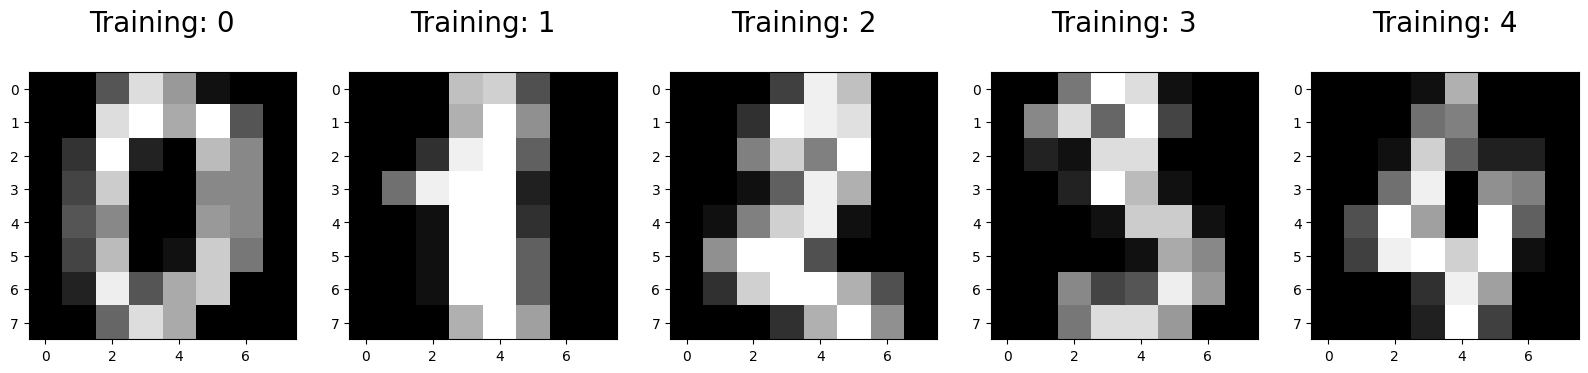

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Build Logistic Regression Model

**Split the Data into Training and Testing Sets**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1383, 64)
y_train shape: (1383,)
X_test shape: (414, 64)
y_test shape: (414,)


**Explanation of Train/Test Split:**

After splitting the dataset into training and testing sets, we get the following shapes:

1. **`X_train shape: (1383, 64)`**  
   - The training set contains **1383 images**.  
   - Each image is represented by **64 features (8x8 pixels)**.  

2. **`y_train shape: (1383,)`**  
   - These are the **labels** for the training set.  
   - There are 1383 labels, one for each training image.  

3. **`X_test shape: (414, 64)`**  
   - The test set contains **414 images**.  
   - Each image is also represented by 64 features.  

4. **`y_test shape: (414,)`**  
   - These are the **labels** for the test set.  
   - There are 414 labels, one for each test image.

**Fitting Multiple Logistic Regression Model to training set**

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predicting the output of the first element of the test set**

In [19]:
print(model.predict(X_test[0].reshape(1,-1)))

[4]


**Predicting for the entire dataset**

In [20]:
y_pred = model.predict(X_test)

**Determing the accuracy of the model**

In [21]:
score = model.score(X_test, y_test)
print(score)

0.9516908212560387


**Representing the confusion matrix in a heat map**

Text(0.5, 69.7222222222222, 'Predicted label')

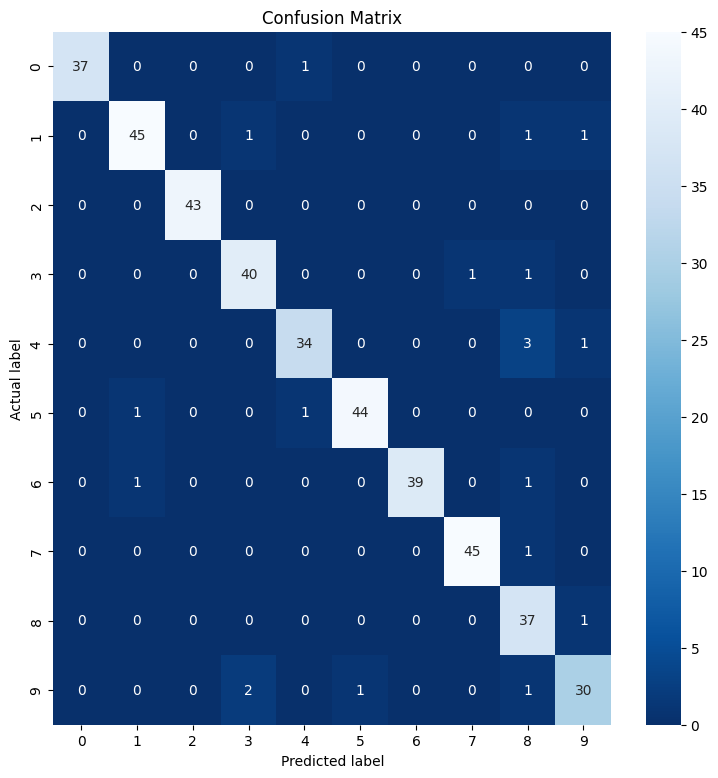

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues_r")
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


**What is a Confusion Matrix?**

A confusion matrix is a table used to evaluate the performance of a classification model.

- **Rows (Actual label):** The true values (actual numbers from 0 to 9).  
- **Columns (Predicted label):** The values predicted by the model.  

Each cell in the matrix shows how many times the model classified a sample from the true class (row) into the predicted class (column).

**Interpreting the outputs:**

- **Values on the main diagonal** (diagonal) like (0→0, 1→1, 2→2…) represent the number of correctly classified samples.  

For example:  
- The number 1 was correctly recognized 45 times.  
- The number 7 was correctly recognized 45 times.  
- The number 9 was correctly recognized 30 times.  

- **Values off the diagonal** represent errors (misclassifications).  

For example:  
- An image of the number 4 was misclassified as 8 three times.  
- An image of the number 9 was misclassified as 2 twice.  
- The number 8 was misclassified once as 9.  

- **Colors:**  
  - Lighter cells → higher numbers.  
  - Darker cells → lower numbers or close to zero.


# Test Prediction

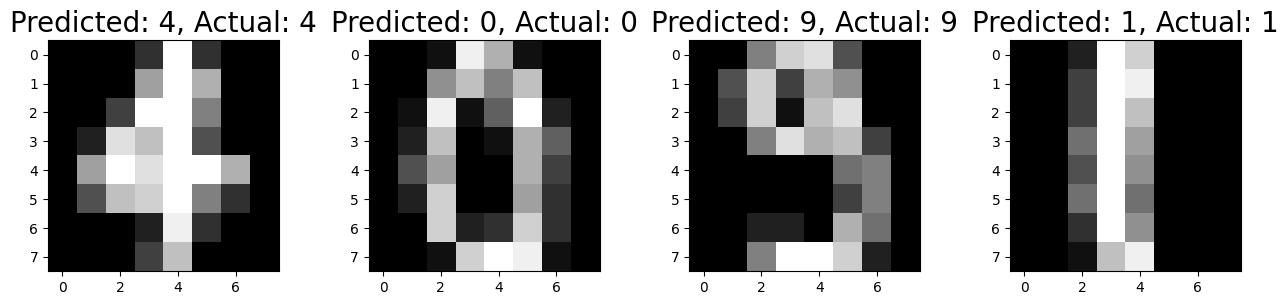

In [28]:
index = 0
classifiedIndex=[]
for predict, actual in zip(y_pred, y_test):
  if predict == actual:
    classifiedIndex.append(index)
  index +=1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1, 5, plotIndex + 1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrong], y_test[wrong]), fontsize = 20)